In [93]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
from scipy.interpolate import LSQUnivariateSpline, UnivariateSpline, splrep, splev
import math
import os
cwd = os.getcwd()

In [11]:
print(cwd)

C:\Users\Yuzhu\OneDrive - Massachusetts Institute of Technology\Fall_2021\1.200\CP\CP1


In [29]:
sub = "\\1.041-1.200-CP1"
q1 = "\\q1"
q2 = "\\q2_v3"
idm_fvd_path = cwd+sub+q1+"\\flow-density-data"
idm_svd_path = cwd+sub+q1+"\\flow-speed-data"
cus_fvd_path = cwd+sub+q2+"\\flow-density-data"
cus_fvd_path = cwd+sub+q2+"\\flow-density-data"

In [82]:
def data(file):
    origin = np.array([[0, 0]])
    d = np.genfromtxt(file, delimiter=",", dtype=np.float64)
#     return np.vstack([origin, d[d[:,0].argsort()]])
    return d[d[:,0].argsort()]

In [83]:
idm_fvd = data(idm_fvd_path)

In [89]:
ind_free = 3
# data = idm_fvd.T
k = lambda fvd: fvd[:,0]
q = lambda fvd: fvd[:,1]
# t = lambda fvd: [fvd[ind_free, 0]]
spl = lambda fvd: LSQUnivariateSpline(fvd[:,0], fvd[:,1], [fvd[ind_free, 0]], k=1, ext=1)


In [90]:
print(idm_fvd)
print(idm_fvd[ind_free, 0])
fit = spl(idm_fvd)
print(fit)

[[ 0.85421412  0.66666667]
 [ 1.63031253  0.86666667]
 [ 1.64304499  0.86666667]
 [ 3.00528409  0.93333333]
 [ 4.50908982  0.86666667]
 [ 6.27146024  0.8       ]
 [ 7.63779445  0.73333333]
 [ 8.39681262  0.6       ]
 [ 8.48204472  0.6       ]
 [ 9.50563887  0.53333333]
 [10.31540326  0.4       ]
 [11.31488249  0.46666667]
 [13.14836661  0.46666667]
 [13.57077176  0.46666667]
 [14.09036565  0.46666667]]
3.005284088744021


In [91]:
print(spl(idm_fvd).get_knots())

[ 0.85421412  3.00528409 14.09036565]


[ 0.85421412  1.63031253  1.64304499  3.00528409  4.50908982  6.27146024
  7.63779445  8.39681262  8.48204472  9.50563887 10.31540326 11.31488249
 13.14836661 13.57077176 14.09036565]
[0.74361351 0.80569022 0.80670864 0.91566817 0.84247516 0.75669733
 0.69019532 0.65325251 0.6491041  0.59928388 0.55987115 0.51122465
 0.42198559 0.40142635 0.37613675]


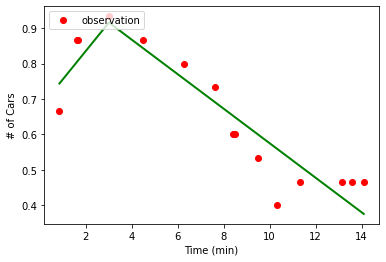

In [92]:
fig, ax = plt.subplots()

# add x-t diagram for vehicles A and B
x = k(idm_fvd)
print(x)
print(fit(x))
dots = ax.plot(x, q(idm_fvd), 'ro', label = "observation")
plt.plot(x, fit(x), 'g-', lw=2)

# view control
ax.set_xlabel("Time (min)")
ax.set_ylabel("# of Cars")
# ax.set_xticks(np.append(4, np.arange(0, 4, 1)))
# ax.set_xlim([0, 4])
# ax.set_ylim([0, 120])
# x = np.array([1, 2, 3])
# y1 = np.array([30, 30, 90])
# y2 = np.array([30, 60, 90])
# fill = ax.fill_between(x, y1, y2, color='grey', alpha=0.4,
#                 interpolate=True, label='Road B Total delay')
# plot decoration
leg = ax.legend(loc='upper left')

# Annotation
# ax.annotate(text='(1, 30)',xy=(1, 30), xytext=(0.5, 40),
#             arrowprops=dict(facecolor='black', arrowstyle = '->'))
# ax.annotate(text='(2, 30)',xy=(2, 30), xytext=(2, 15),
#             arrowprops=dict(facecolor='black', arrowstyle = '->'))
# ax.annotate(text='(3, 90)',xy=(3, 90), xytext=(2.5, 100),
#             arrowprops=dict(facecolor='black', arrowstyle = '->'))